# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Необходимо подготовить модель для предсказания коэффициента восстановления золота из золотосодержащей руды.

1.1 Загрузим данные в проект и посмотрим на их качество:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
gold_industry_train = pd.read_csv('/datasets/gold_industry_train.csv')
gold_industry_test = pd.read_csv('/datasets/gold_industry_test.csv')
gold_industry_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
print(gold_industry_train.head())
gold_industry_train.info()

                  date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599             

In [4]:
gold_industry_train.loc[gold_industry_train['rougher.input.feed_pb'].isna()]

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
262,2016-01-27 14:00:00,3.514019,7.504396,NaN,29.200848,202.024295,60.125904,4.500554,2.616880,1000.752695,...,2.088724,40.328310,9.292335,8.603079,NaN,40.604484,2.163724,11.107299,0.340029,5.535904
354,2016-02-01 04:00:00,4.155161,8.782859,NaN,NaN,411.555909,36.936359,6.966367,5.552877,1000.501509,...,9.624694,44.654136,5.637249,9.405023,0.911648,42.357525,2.493415,11.555843,1.498860,11.246721
760,2016-02-18 22:00:00,3.682222,7.146042,NaN,29.748334,477.952640,54.936135,6.016813,3.638118,991.691682,...,9.869267,31.183485,3.253537,7.229496,5.910253,68.950557,1.244647,8.182029,NaN,6.746923
761,2016-02-18 23:00:00,4.478027,7.888903,NaN,33.534971,492.788388,54.891904,5.501627,3.220578,990.982997,...,10.580796,46.534848,4.242921,10.294672,7.586523,62.388421,1.791831,10.674696,NaN,9.679080
852,2016-02-22 22:00:00,3.691317,7.551066,NaN,NaN,489.383457,49.991229,4.785527,3.095143,989.995014,...,11.445213,41.755563,4.643427,11.799903,7.532330,29.387374,2.676058,10.644910,1.278552,13.509223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,2017-10-29 16:59:59,2.580635,6.073631,NaN,37.765261,567.529347,73.841291,5.000655,5.994722,1201.352626,...,NaN,48.615709,5.057524,7.229031,7.332347,55.156682,1.192146,8.034637,NaN,9.284135
13631,2017-10-29 17:59:59,2.360476,5.883977,NaN,38.234520,569.094971,75.505748,4.998693,6.005962,1201.940093,...,NaN,47.433556,5.335373,7.743405,7.182489,50.654132,1.194918,7.966360,NaN,9.305998
13632,2017-10-29 18:59:59,1.906268,5.797719,NaN,37.348796,561.250215,76.811876,5.006768,6.000786,1199.020739,...,NaN,46.956869,5.404983,8.016256,7.080704,44.948866,1.068927,7.643900,NaN,9.801377
13633,2017-10-29 19:59:59,1.527903,5.408359,NaN,37.566618,552.470373,76.944781,4.992863,6.001043,1201.204819,...,NaN,48.012117,5.288464,7.474680,7.219399,25.996403,1.140136,8.025980,NaN,9.104751


In [5]:
gold_industry_full.loc[gold_industry_full['secondary_cleaner.output.tail_sol'].isna()]

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
1246,2016-03-13 15:00:00,3.048159,7.480951,NaN,NaN,176.819859,55.244951,3.996756,2.495699,1000.680318,...,NaN,43.050052,9.943401,7.542210,NaN,5.982863,2.877984,11.186132,1.037645,4.265981
1247,2016-03-13 16:00:00,3.505424,7.183713,0.128727,4.592246,180.243408,58.221271,4.001671,2.641549,1000.448072,...,NaN,43.818753,8.254964,7.972211,NaN,15.662743,2.993891,11.107211,1.131023,5.198314
1248,2016-03-13 17:00:00,3.620424,6.984627,0.207522,7.439166,182.515174,63.696344,4.001410,2.698338,999.961347,...,NaN,43.559539,7.787343,7.917894,NaN,14.902894,3.119516,10.908130,1.206914,6.867096
1249,2016-03-13 18:00:00,6.534862,6.551526,1.853841,37.467000,529.725865,55.073020,10.003891,6.593494,1000.133199,...,NaN,43.640888,11.775092,7.372489,NaN,43.599205,3.943147,10.294284,1.396756,11.612120
1401,2016-03-20 02:00:00,8.086302,7.457926,3.671468,32.185674,388.517277,49.462609,9.608510,5.539600,999.445896,...,NaN,35.807707,6.798401,11.782250,5.997066,67.062377,3.138787,7.608727,2.068846,8.209583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18088,2018-06-09 02:59:59,8.942718,7.998393,3.666901,19.992433,396.065638,106.423576,7.891429,3.869992,997.438527,...,NaN,36.825223,6.135117,9.744491,6.280453,100.000000,0.000000,0.000000,0.000000,0.000000
18089,2018-06-09 03:59:59,8.158937,7.392325,3.356508,26.752285,179.697976,363.989699,0.028409,0.015783,996.643699,...,NaN,39.874583,6.242741,10.720274,6.039185,76.157428,2.304393,4.651268,1.604179,2.527466
18090,2018-06-09 04:59:59,8.015369,7.346626,3.456978,19.271997,180.283437,136.252925,0.031021,0.018068,999.344111,...,NaN,41.978537,5.606505,10.420360,6.065921,48.263481,4.567816,8.451131,3.030603,4.476364
18358,2018-06-21 04:59:59,10.302863,10.454787,3.469186,34.102832,450.942486,47.677955,9.988826,6.483357,1000.262379,...,NaN,13.342229,2.296090,2.581156,2.252435,93.589956,2.381612,5.822414,1.533861,3.164283


In [6]:
gold_industry_test.loc[gold_industry_test['rougher.input.feed_pb'].isna()]

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
593,2018-01-14 21:59:59,1.567181,5.754863,NaN,37.923502,510.812634,68.523956,5.005570,4.711896,1197.910761,...,30.022631,-498.727322,22.040393,-499.427831,25.017645,-499.973026,22.984164,-500.164116,24.992154,-499.743822
835,2018-02-02 23:59:59,2.815890,6.128690,NaN,42.448171,533.785976,75.343884,5.004810,4.999046,1201.981142,...,30.016414,-501.072985,19.983553,-500.157182,25.016060,-500.772859,23.009988,-500.119777,24.980096,-500.072790
836,2018-02-03 00:59:59,2.891693,6.211225,NaN,41.966903,583.739319,77.110459,5.000377,5.002892,1198.791879,...,30.012373,-502.142339,19.841365,-501.125175,24.993037,-500.487172,22.979754,-500.007838,24.986214,-500.099652
837,2018-02-03 01:59:59,2.664240,5.862863,NaN,40.464959,568.328803,77.269229,4.996561,5.060176,1201.630075,...,30.015214,-495.662792,20.043123,-498.371977,24.993173,-498.123865,23.004359,-499.672881,24.996677,-498.634913
838,2018-02-03 02:59:59,3.288108,6.372757,NaN,42.545296,579.277726,80.590023,5.203311,5.675847,1204.597354,...,29.987397,-501.051064,19.972289,-499.635388,25.000540,-500.624888,22.975748,-499.913198,24.968321,-499.959513
844,2018-02-03 08:59:59,4.057594,6.510478,NaN,38.381958,561.059826,75.077195,5.005644,5.196432,1194.775195,...,30.005189,-498.668498,19.913505,-499.294871,25.008953,-499.334722,23.010726,-500.093261,25.016404,-500.095148
845,2018-02-03 09:59:59,3.125779,6.308087,NaN,35.711194,560.982586,74.583358,4.995903,5.199000,1200.063962,...,30.022671,-501.999158,19.962413,-500.319286,25.008025,-500.542059,22.997063,-500.040470,24.994111,-500.385286
847,2018-02-03 11:59:59,3.203214,5.909170,NaN,37.894633,564.018230,80.413398,4.996444,5.197157,1198.777615,...,30.006309,-498.218111,19.888326,-499.875033,25.009116,-499.547858,23.025394,-499.976413,24.992912,-499.710579
848,2018-02-03 12:59:59,2.406989,5.727992,NaN,37.010155,559.726403,79.159090,5.002757,5.202703,1204.027938,...,30.012308,-499.484521,19.911201,-500.129941,25.010029,-500.089265,22.997125,-500.141310,25.010350,-500.384210
849,2018-02-03 13:59:59,2.012762,5.924086,NaN,36.353826,559.859454,78.313642,5.001062,5.199816,1201.820029,...,30.032559,-501.116519,19.894668,-500.184107,24.986056,-499.919750,23.008245,-499.880273,24.975394,-499.824020


In [7]:
gold_industry_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [8]:
gold_industry_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

В файлах содержится выборка для построения модели, предсказывающей к-нт восстановления золота из руды.

1.2 Проверим расчет эффективности флотации, для этого воспользуемся формулой
Recovery = (rougher.output.concentrate_au * (rougher.input.feed_au - rougher.output.tail_au)) / (rougher.input.feed_au * (rougher.output.concentrate_au - rougher.output.tail_au)). Сравним полученное значение с rougher.output.recovery через МАЕ

In [9]:
rougher_output_recovery_check = []
for i in range(len(gold_industry_train)):
    c = gold_industry_train.loc[i, 'rougher.output.concentrate_au']
    f = gold_industry_train.loc[i, 'rougher.input.feed_au']
    t = gold_industry_train.loc[i, 'rougher.output.tail_au']
    rougher_output_recovery_check.append((c * (f - t)) * 100 / (f * (c - t))) 
#rougher_output_recovery_check

In [10]:
mae = mean_absolute_error(gold_industry_train['rougher.output.recovery'], rougher_output_recovery_check)
print(mae)

1.1181885454685472e-14


Значение MAE стремится к 0, так и должно быть, если расчеты верны.

1.3 Проанализируем столбцы, отсутствующие в тестовой выборке:

In [11]:
col_eps = []
count = 0
for col_full in gold_industry_full.columns:
    count = 0
    for col_test in gold_industry_test.columns:
        if col_full != col_test:
            count += 1
    if count == gold_industry_test.shape[1]:
        col_eps.append(col_full)
print(len(col_eps))
col_eps
    

34


['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

В тестовой выборке отсутствуют столбцы с расчетными параметрами, которые считаются в лаборатории после проведения очистки золотой руды (4 столбца calculation) и все остальные столбцы с итоговыми концентрациями веществ после флотации и двух очисток. Они, действительно, не нужны в тестовой выборке, т.к. по сути должны являться результами работы создаваемой модели.

1.4 Выполним предобработку данных: проверим аномальные значения, удалим/заполним пропуски, удалим дубликаты

Во-первых, удвлим строки с анамальными значениями (с нулями) в таргетных столбцах тренировочной выборки: rougher.output.recovery и final.output.recovery

In [12]:
gold_industry_train_cor = gold_industry_train.loc[gold_industry_train['final.output.recovery'] != 0]
gold_industry_train_cor = gold_industry_train_cor.loc[gold_industry_train_cor['rougher.output.recovery'] != 0]
gold_industry_train_cor.reset_index(drop=True, inplace=True)

In [13]:
for col in gold_industry_train_cor.columns:
    if col != 'date':
        if gold_industry_train_cor[col].min() <= 0:
            print(col, ' ', gold_industry_train_cor[col].min())

rougher.state.floatbank10_a_air   -0.0420692901306623
rougher.state.floatbank10_a_level   -657.9497594243531
rougher.state.floatbank10_b_air   -0.721806395101524
rougher.state.floatbank10_b_level   -650.2600075387917
rougher.state.floatbank10_c_air   -0.0566355064511299
rougher.state.floatbank10_c_level   -647.5444393129106
rougher.state.floatbank10_d_air   -0.9922190308570862
rougher.state.floatbank10_d_level   -648.3906653215574
rougher.state.floatbank10_e_air   -1.9822953939437864
rougher.state.floatbank10_e_level   -649.443910909439
rougher.state.floatbank10_f_air   -2.5933895111083984
rougher.state.floatbank10_f_level   -649.9492825412451
rougher.calculation.sulfate_to_au_concentrate   -15488584.029689554
rougher.calculation.floatbank10_sulfate_to_au_feed   -486.5986753054797
rougher.calculation.floatbank11_sulfate_to_au_feed   -264.9827850134316
rougher.calculation.au_pb_ratio   -0.0105476129695348
primary_cleaner.input.depressant   0.0
primary_cleaner.state.floatbank8_a_level   

Проверим нет ли отрицательных значений в столбцах с концентрацией

In [14]:
for col in gold_industry_train_cor.columns:
    if col != 'date':
        if gold_industry_train_cor[col].max() == np.inf:
            print(col, ' ', gold_industry_train_cor[col].max())

Отрицательные значения в столбцах с параметрами работы флотационных установок, думаю допустимо.

Проверим пропуски в столбцах:

In [15]:
gold_industry_train_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14089 entries, 0 to 14088
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14089 non-null  object 
 1   rougher.input.feed_au                               14089 non-null  float64
 2   rougher.input.feed_ag                               14089 non-null  float64
 3   rougher.input.feed_pb                               14017 non-null  float64
 4   rougher.input.feed_sol                              14016 non-null  float64
 5   rougher.input.feed_rate                             14082 non-null  float64
 6   rougher.input.feed_size                             13993 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14059 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14082 non-null  float64


In [16]:
gold_industry_train_cor.loc[gold_industry_train_cor['rougher.input.floatbank11_xanthate'].isna()]

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
75,2016-01-18 12:00:00,3.331100,7.495765,0.992989,NaN,0.346667,40.044981,NaN,0.002655,1000.522008,...,6.270162,27.097386,2.660271,6.020833,2.339234,58.017871,1.505868,5.640190,0.865842,7.574660
822,2016-02-22 01:00:00,4.132606,8.552262,1.613576,NaN,21.293760,27.619041,0.639700,0.004863,1000.376730,...,9.809034,41.529734,4.637727,12.557566,7.821058,0.463711,4.115341,11.388568,1.893716,7.735606
1773,2016-04-14 17:00:00,10.899886,11.610162,4.383769,29.466625,361.438078,42.144402,9.752428,5.418245,997.838985,...,12.203356,40.786718,6.880750,9.572077,9.480136,79.975380,2.775958,6.342270,1.476263,5.255867
1774,2016-04-14 18:00:00,10.208728,10.871370,4.221773,29.605406,388.148906,43.559513,7.968636,4.744994,993.468490,...,12.979505,34.596352,7.323588,10.041570,7.629171,45.586191,6.418327,7.796991,2.498256,8.273201
2147,2016-05-08 09:59:59,6.476451,7.141677,2.956787,31.529297,0.160741,50.810210,0.009081,0.006156,-0.041078,...,11.639648,48.166565,3.132967,9.577148,8.264648,46.375447,3.703931,7.381221,2.456787,10.764648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316,2017-08-01 09:59:59,4.477299,5.146937,2.161388,18.860447,198.993315,49.215826,9.973836,6.304479,1400.507767,...,0.430136,36.057772,8.259471,11.381804,7.303023,21.993526,3.590641,10.991202,2.315339,4.608805
11317,2017-08-01 10:59:59,4.278355,4.692302,2.095538,18.059044,202.903704,105.498643,9.999317,5.495937,1400.111542,...,NaN,32.869943,9.013610,11.100069,7.143159,9.060425,3.937149,10.602336,2.329051,4.007975
11467,2017-08-08 09:59:59,6.857800,6.732854,3.055636,NaN,0.023788,34.478603,NaN,NaN,1402.488908,...,NaN,44.321444,5.689312,10.461158,6.734358,41.571286,4.282378,11.257912,2.720925,4.051032
11813,2017-08-28 09:59:59,4.857160,4.899445,1.961413,0.463867,NaN,44.890772,NaN,0.009750,1400.972073,...,NaN,34.720929,7.274610,9.827861,6.982298,16.423530,4.154902,9.218000,1.784397,5.561126


In [17]:
gold_industry_train_cor.loc[72:80, 'rougher.input.floatbank11_xanthate']

72    7.606026
73    7.597842
74    3.386577
75         NaN
76    3.570085
77    3.600455
78    6.141831
79    6.996058
80    7.128668
Name: rougher.input.floatbank11_xanthate, dtype: float64

Можно заполнить пропуски ближайшим не пустым значением сверху, поскольку данные следуют в хронологическом порядке

In [18]:
def fill_columns(g, c):
    g[c] = g[c].fillna(0)
    for i in range(len(g)):
        if (g.loc[i, c]) == 0:
            g.loc[i, c] = g.loc[i - 1, c]
    return 

for col in gold_industry_train_cor.columns:
    fill_columns(gold_industry_train_cor, col)

#fill_columns(gold_industry_train_cor, 'rougher.input.feed_sol')

In [19]:
gold_industry_train_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14089 entries, 0 to 14088
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14089 non-null  object 
 1   rougher.input.feed_au                               14089 non-null  float64
 2   rougher.input.feed_ag                               14089 non-null  float64
 3   rougher.input.feed_pb                               14089 non-null  float64
 4   rougher.input.feed_sol                              14089 non-null  float64
 5   rougher.input.feed_rate                             14089 non-null  float64
 6   rougher.input.feed_size                             14089 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14089 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14089 non-null  float64


In [20]:
gold_industry_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [21]:
def fill_columns(g, c):
    g[c] = g[c].fillna(0)
    for i in range(len(g)):
        if (g.loc[i, c]) == 0:
            g.loc[i, c] = g.loc[i - 1, c]
    return 

for col in gold_industry_test.columns:
    fill_columns(gold_industry_test, col)

Проверим дубликаты

In [22]:
gold_industry_train_cor['date'].nunique()

14089

Дубликатов нет

## Анализ данных

2.1 Как меняется концентрация металлов в процессе подготовки золота

Концентрация золота в процессе обработки в среднем увеличивается с 8 до 44, линейный рост

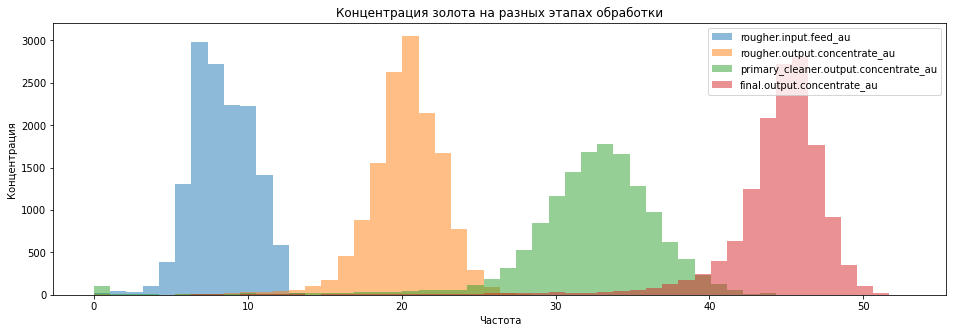

In [23]:
yy = gold_industry_train_cor[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
yy.plot(kind='hist', bins=50, figsize=(16,5), title='Концентрация золота на разных этапах обработки', xlabel='Концентрация', alpha=0.5)
plt.xlabel('Частота')
plt.ylabel('Концентрация')
plt.show()

Концентрация серебра в процессе обработки золотой руды в среднем снижается с 8 до 5

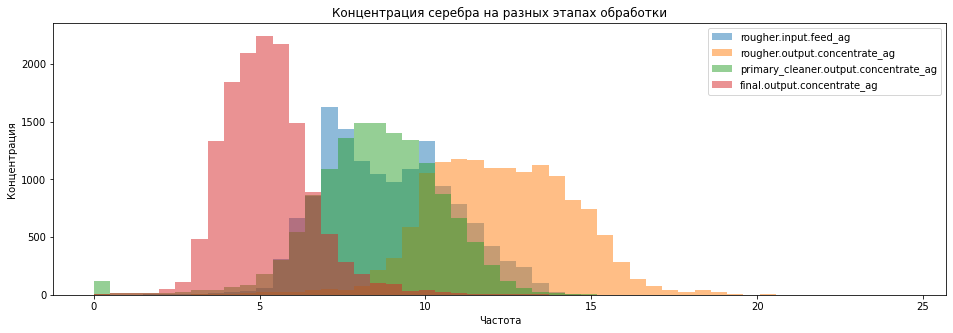

In [24]:
yy = gold_industry_train_cor[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
yy.plot(kind='hist', bins=50, figsize=(16,5), title='Концентрация серебра на разных этапах обработки', xlabel='Концентрация', alpha=0.5)
plt.xlabel('Частота')
plt.ylabel('Концентрация')
plt.show()

Концентрация свинца в процессе обработки золотой руды в среднем растет с 3 до 10

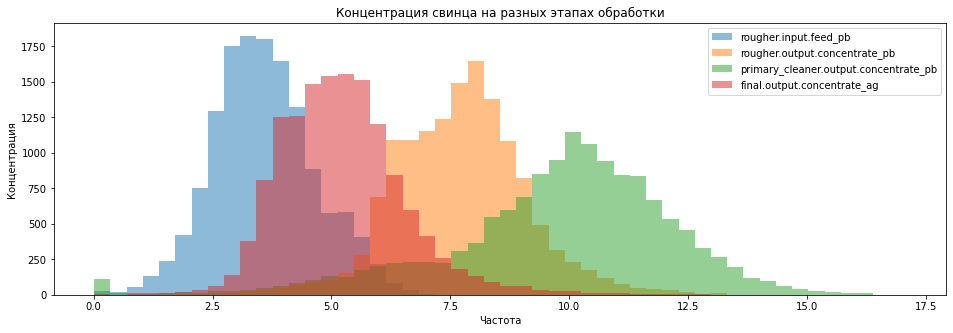

In [25]:
yy = gold_industry_train_cor[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_ag']]
yy.plot(kind='hist', bins=50, figsize=(16,5), title='Концентрация свинца на разных этапах обработки', xlabel='Концентрация', alpha=0.5)
plt.xlabel('Частота')
plt.ylabel('Концентрация')
plt.show()

2.2 Построим распределения размеров гранул сырья в тестовой и тренировочной выборках

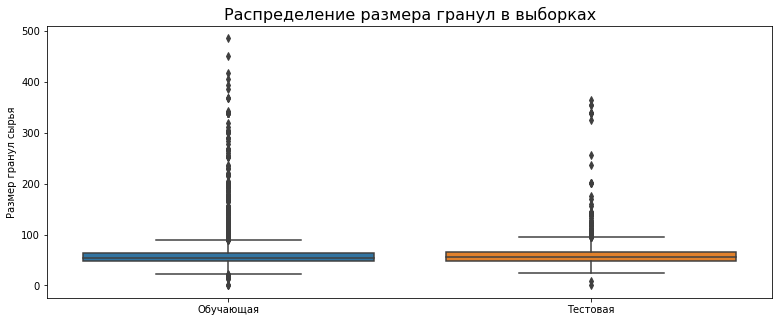

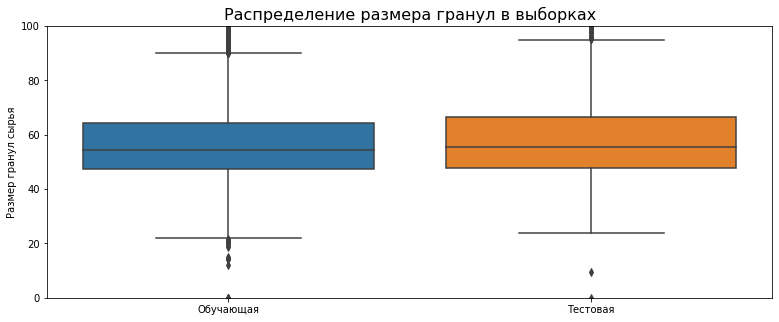

In [26]:
plt.figure(figsize=(13,5))
plt.title('Распределение размера гранул в выборках', fontsize=16)
sns.boxplot(data=[gold_industry_train_cor['rougher.input.feed_size'], gold_industry_test['rougher.input.feed_size']])
plt.gca().set_xticklabels(['Обучающая', 'Тестовая'])
plt.ylabel('Размер гранул сырья')
plt.show()

plt.figure(figsize=(13,5))
plt.ylim(0,100)
plt.title('Распределение размера гранул в выборках', fontsize=16)
sns.boxplot(data=[gold_industry_train_cor['rougher.input.feed_size'], gold_industry_test['rougher.input.feed_size']])
plt.gca().set_xticklabels(['Обучающая', 'Тестовая'])
plt.ylabel('Размер гранул сырья')
plt.show()

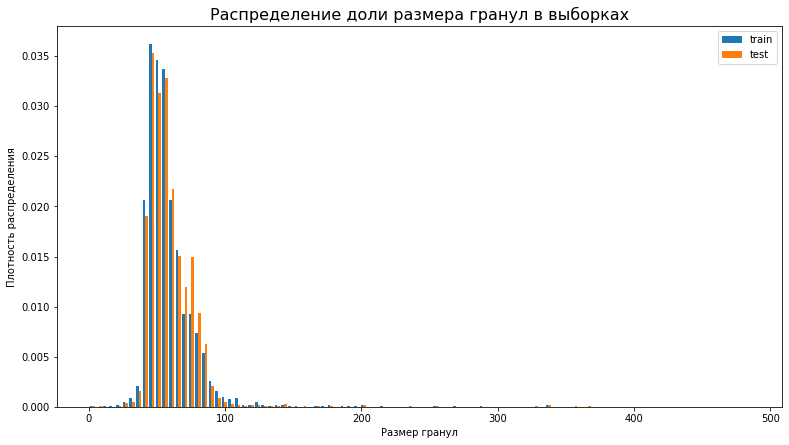

In [27]:
data = pd.DataFrame(gold_industry_train_cor['rougher.input.feed_size'])
data.rename(columns = {'rougher.input.feed_size':'train'}, inplace = True)
data['test'] = gold_industry_test['rougher.input.feed_size']
plt.figure(figsize=(13, 7))
plt.hist(data, bins=100, density=True)
plt.legend(data.columns)
plt.gca().set(ylabel='Плотность распределения', xlabel='Размер гранул')
plt.title('Распределение доли размера гранул в выборках', fontsize=16)
plt.show()

In [28]:
results = st.ttest_ind(
    gold_industry_train_cor['rougher.input.feed_size'], gold_industry_test['rougher.input.feed_size'], equal_var=True)
print('p-значение: ', results.pvalue)

p-значение:  0.9661391324294635


Распределение размеров гранул исходного сырья на тестовой и тренировочной выборках сопоставимы, они похожи по выбросам, по средним и медианным значениям. Графики их распределения сопоставимы. t-test о равенстве средних p-value = 0.966 - гипотезу о равенстве средних можно не отвергать

2.3 Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате

In [29]:
au_rough_in = gold_industry_train_cor['rougher.input.feed_au']
ag_rough_in = gold_industry_train_cor['rougher.input.feed_ag']
pb_rough_in = gold_industry_train_cor['rougher.input.feed_pb']
metal_rough_in = au_rough_in + ag_rough_in + pb_rough_in

au_rough_out = gold_industry_train_cor['rougher.output.concentrate_au']
ag_rough_out = gold_industry_train_cor['rougher.output.concentrate_ag']
pb_rough_out = gold_industry_train_cor['rougher.output.concentrate_pb']
metal_rough_out = au_rough_out + ag_rough_out + pb_rough_out

au_prim = gold_industry_train_cor['primary_cleaner.output.concentrate_au']
ag_prim = gold_industry_train_cor['primary_cleaner.output.concentrate_ag']
pb_prim = gold_industry_train_cor['primary_cleaner.output.concentrate_pb']
metal_prim = au_prim + ag_prim + pb_prim

au_final = gold_industry_train_cor['final.output.concentrate_au']
ag_final = gold_industry_train_cor['final.output.concentrate_ag']
pb_final = gold_industry_train_cor['final.output.concentrate_pb']
metal_final = au_final + ag_final + pb_final

metal_rough_in = pd.DataFrame(metal_rough_in)
metal_rough_out = pd.DataFrame(metal_rough_out)
metal_prim = pd.DataFrame(metal_prim)
metal_final = pd.DataFrame(metal_final)

metal = metal_rough_in
metal['metal_rough_in'] = metal_rough_in
metal['metal_rough_out'] = metal_rough_out
metal['metal_prim'] = metal_prim
metal['metal_final'] = metal_final
del metal[metal.columns[0]]
print(metal.head())

   metal_rough_in  metal_rough_out  metal_prim  metal_final
0       14.871440        38.395653   53.111627    58.137072
1       14.905729        38.945647   53.174338    58.699942
2       14.638299        38.649756   52.927464    58.927421
3       14.199305        38.411473   43.979185    58.714815
4       13.511497        38.867359   52.121146    59.065251


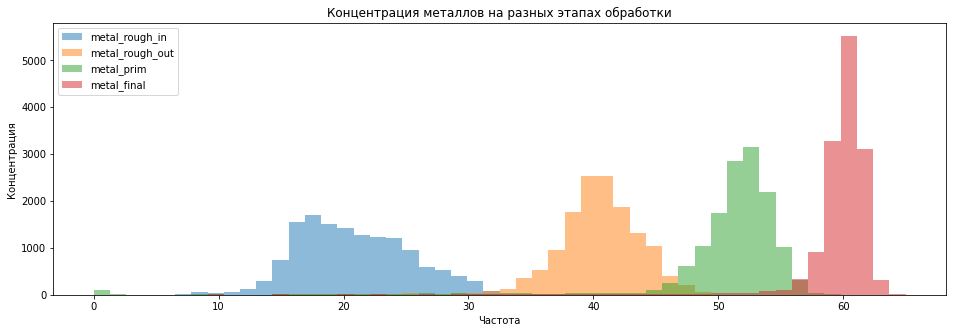

In [30]:
yy = metal
yy.plot(kind='hist', bins=50, figsize=(16,5), title='Концентрация металлов на разных этапах обработки', xlabel='Концентрация', alpha=0.5)
plt.xlabel('Частота')
plt.ylabel('Концентрация')
plt.show()

Суммарная концентрация металлов в процессе обработки растет

Затем приведем тренировочную выборку к тестовой: удалим столбцы, которых нет в тесте

In [32]:
for col in col_eps:
    if col != 'final.output.recovery' and col != 'rougher.output.recovery':
        gold_industry_train_cor = gold_industry_train_cor.drop([col], axis=1)

gold_industry_train_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14089 entries, 0 to 14088
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14089 non-null  object 
 1   rougher.input.feed_au                       14089 non-null  float64
 2   rougher.input.feed_ag                       14089 non-null  float64
 3   rougher.input.feed_pb                       14089 non-null  float64
 4   rougher.input.feed_sol                      14089 non-null  float64
 5   rougher.input.feed_rate                     14089 non-null  float64
 6   rougher.input.feed_size                     14089 non-null  float64
 7   rougher.input.floatbank10_sulfate           14089 non-null  float64
 8   rougher.input.floatbank10_xanthate          14089 non-null  float64
 9   rougher.state.floatbank10_a_air             14089 non-null  float64
 10  rougher.st

## Модель

3.1 Функция для вычисления итоговой sMAPE

In [33]:
def smape(target, prediction):
    if len(target) == len(prediction):
        return 1 / len(target) * np.sum(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction))) * 100
    else:
        return print('Проверьте размерности массивов')
    
def smape_total(smape_rough, smape_final):
    return (0.25 * smape_rough) + (0.75 * smape_final)

score_check = make_scorer(smape, greater_is_better=False)

3.2 Обучим модели и проверим качество на тестовой выборке

Определим данные, необходимые для оценки rougher.output.recovery. Она зависит от столбцов, содержащих rougher

In [34]:
rougher_train = gold_industry_train_cor
for col in gold_industry_train_cor.columns:
    a = col.split('.') 
    if a[0] != 'rougher':
        rougher_train = rougher_train.drop([col], axis=1)

In [35]:
target_rougher = rougher_train['rougher.output.recovery']
features_rougher = rougher_train.drop('rougher.output.recovery', axis=1)

При помощи GridSearchCV определим лучшие гиперпараметры для модели случайного леса

In [39]:
model_rougher = RandomForestRegressor(random_state=12345)

grid_space={'max_depth':[3, 5, 10],
              'n_estimators':[10, 50, 100]
           }

grid = GridSearchCV(model_rougher, param_grid=grid_space, cv=3, scoring=score_check)
model_grid = grid.fit(features_rougher, target_rougher)

print('Лучшие гиперпараметры леса: '+str(model_grid.best_params_))
print('Лучший smape леса: '+str(abs(model_grid.best_score_)))

Лучшие гиперпараметры леса: {'max_depth': 5, 'n_estimators': 100}
Лучший smape леса: 6.498870445253075


Полученные гиперпараметры используем в кросс-валидации

Проверим smape на тестовой выборке

In [41]:
model_rougher2 = DecisionTreeRegressor(random_state=12345)

scores_rougher2 = []
scores_rougher2 = cross_val_score(model_rougher2, features_rougher, target_rougher, scoring=score_check)

final_score_rougher2 = scores_rougher2.mean()
print('Средняя оценка качества модели по smape для линейной регрессии:', abs(final_score_rougher2))

Средняя оценка качества модели по smape для линейной регрессии: 8.77079425949412


In [38]:
gold_industry_full_merge = gold_industry_full[['date', 'rougher.output.recovery']]

gold_industry_test_merge = pd.merge(gold_industry_test, gold_industry_full_merge,
    left_on='date',
    right_on='date',
    how='left'
)

In [39]:
rougher_test = gold_industry_test_merge

for col in gold_industry_test_merge.columns:
    a = col.split('.') 
    if a[0] != 'rougher':
        rougher_test = rougher_test.drop([col], axis=1)
#rougher_test

In [40]:
target_rougher_test = rougher_test['rougher.output.recovery']
features_rougher_test = rougher_test.drop('rougher.output.recovery', axis=1)

In [46]:
predict_test_rough = model_grid.predict(features_rougher_test)
smape_rough = smape(predict_test_rough, target_rougher_test)
print('Средняя оценка качества модели по smape на тесте для леса:', abs(smape_rough))

Средняя оценка качества модели по smape на тесте для леса: 4.111693159247909


Для тестовой модели smape = 4.11

Определим данные, необходимые для оценки final.output.recovery.

In [41]:
target_final = gold_industry_train_cor['final.output.recovery']
features_final = gold_industry_train_cor.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)

При помощи GridSearchCV определим лучшие гиперпараметры для модели случайного леса

In [48]:
model_final = RandomForestRegressor(random_state=12345)

grid_space={'max_depth':[3, 5, 10],
              'n_estimators':[10, 50, 100]
           }
grid = GridSearchCV(model_final, param_grid=grid_space, cv=3, scoring=score_check)
model_grid = grid.fit(features_final, target_final)

print('Лучшие гиперпараметры для леса: '+str(model_grid.best_params_))
print('Лучший smape для леса: '+str(abs(model_grid.best_score_)))

Лучшие гиперпараметры для леса: {'max_depth': 5, 'n_estimators': 100}
Лучший smape для леса: 10.044289775988885


Полученные гиперпараметры используем в кросс-валидации

In [50]:
model_final2 = DecisionTreeRegressor(random_state=12345)

scores_final2 = []
scores_final2 = cross_val_score(model_final2, features_final, target_final, scoring=score_check)

final_score_final = scores_final2.mean()
print('Средняя оценка качества модели по smape на модели линейной регрессии:', abs(final_score_final))


Средняя оценка качества модели по smape на модели линейной регрессии: 16.165101041118554


Проверим smape на тестовой выборке

In [42]:
gold_industry_full_merge2 = gold_industry_full[['date', 'final.output.recovery']]

gold_industry_test_merge2 = pd.merge(gold_industry_test, gold_industry_full_merge2,
    left_on='date',
    right_on='date',
    how='left'
)


In [43]:
target_final_test = gold_industry_test_merge2['final.output.recovery']
features_final_test = gold_industry_test_merge2.drop(['date', 'final.output.recovery'], axis=1)

In [53]:
predict_test_final = model_grid.predict(features_final_test)
smape_final = smape(predict_test_final, target_final_test)
print('Средняя оценка качества модели по smape на тесте для леса:', abs(smape_final))


Средняя оценка качества модели по smape на тесте для леса: 7.412482148916327


Рассчитаем итоговый smape

In [55]:
smape_final = smape_total(abs(smape_rough), abs(smape_final))
print('Итоговое значение smape для тестовой выборки = ', smape_final)

Итоговое значение smape для тестовой выборки =  6.587284901499223


In [46]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_rougher, target_rougher)
answer_dummy = dummy_regr.predict(features_rougher_test)
smape_dummy_rougher = smape(answer_dummy, target_rougher_test)
print('smape для Dummy модели = ', smape_dummy)

smape для Dummy модели =  9.254925539670214


In [47]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_final, target_final)
answer_dummy = dummy_regr.predict(features_final_test)
smape_dummy_final = smape(answer_dummy, target_final_test)
print('smape для Dummy модели = ', smape_dummy)

smape для Dummy модели =  9.254925539670214


In [48]:
smape_final = smape_total(abs(smape_dummy_rougher), abs(smape_dummy_final))
print('Итоговое значение smape для тестовой выборки константной модели = ', smape_final)

Итоговое значение smape для тестовой выборки константной модели =  8.4677873639743


Smape для Dummy модели больше чем smape для тестовой выборки модели леса (9.46 против 6.58). Подобранная модель лучше предсказывает золотоотдачу.

Вывод: В ходе работы проанализированы данные об обогащении золотой руды, разделенные на три выборки. Выполнена предобработка данных (заполнены пустые значения, в тестовую выборку добавлены целевые столбцы). Исследована зависимость концентрации металлов, содержащихся в руде на каждом этапе обогащения (для золота концентрация растет, для серебра - падает, для свинца - растет). Выполнено сравнение размеров гранул исходного сырья в обучающей и тестовой выборке (совпадают). Происследована суммарная концентрация металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате (концентрация растет). На основе функции smape (чем ниже smape, тем лучше) обучена модель случайного леса. Получено значение smape для тестовой выборки, равно 9.